# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 
To test what you learned in the class, we will hold a competition. You will create a classifier that predicts how the level of some text in French (A1,..., C2). The team with the highest rank will get some goodies in the last class (some souvenirs from tech companies: Amazon, LinkedIn, etc).

**2 people per team**

Choose a team here:
https://moodle.unil.ch/mod/choicegroup/view.php?id=1305831


#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2022_[your_team_name]` with the following structure:
- data (folder) 
- code (folder) 
- documentation (folder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach, summary of results table and link to the explainatory video (see below).*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using the invitation link we sent on Slack.

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

BE CREATIVE! You can use whatever method you want, in order to climb the leaderboard. The only rule is that it must be your own work. Given that, you can use all the online resources you want. 

#### 5. 🎥 Create a YouTube video (5-10 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. *Select* projects will also be presented live by the group during the last class.


### Submission details (one per team)

1. Download a ZIPped file of your team's repository and submit it in Moodle here. IMPORTANT: in the comment of the submission, insert a link to the repository on Github.
https://moodle.unil.ch/mod/assign/view.php?id=1305833



### Grading (one per team)
- 20% Kaggle Rank
- 50% code quality (using classes, splitting into proper files, documentation, etc)
- 15% github quality (include link to video, table with progress over time, organization of code, images, etc)
- 15% video quality (good sound, good slides, interesting presentation).

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (optional but useful). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [1]:
# reading in the data via the Kaggle API

# mount your Google Drive
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [2]:
# install Kaggle
#! pip install kaggle

### IMPORTANT
Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file. Save it in your Google Drive (not in a folder, in your general drive).

In [3]:
#!mkdir ~/.kaggle

In [4]:
#read in your Kaggle credentials from Google Drive
#!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [5]:
#!mkdir data


In [6]:
# download the dataset from the competition page
#! kaggle competitions download -c detecting-french-texts-difficulty-level-2022

In [7]:
#!unzip "detecting-french-texts-difficulty-level-2022.zip" -d data

In [8]:
# read in your training data
import pandas as pd
import numpy as np


df = pd.read_csv('../data/training_data.csv')

In [9]:
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [10]:
df_pred = pd.read_csv('../data/unlabelled_test_data.csv')
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [11]:
#df_example_submission = pd.read_csv('/content/data/sample_submission.csv')
#df_example_submission.head()

### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem?

In [12]:
from lib.DataVectorizer import DataVectorizer
from lib.DataManager import DataManager
from lib.DataCleaner import DataCleaner
from lib.ClassifierManager import ClassifierManager

In [13]:
classifiermanager = ClassifierManager()
datavectorizer = DataVectorizer()
datacleaner = DataCleaner()

In [14]:

datamanager = DataManager(df,"difficulty","sentence")

datamanager.labelEncode("difficulty")


#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [15]:
datamanager.splitData(0.2,0)

datavectorizer.fit("tfidf",datamanager)

Calculate accuracy, precision, recall and F1 score on the test set.

In [16]:
log_reg =  classifiermanager.fit_predict("logistic_regression",datamanager,verbose=True, params={"solver":'lbfgs', "max_iter":1000, "random_state":50})

CONFUSION MATRIX:
[[93 31 21 10  4  2]
 [54 60 30  6  6  8]
 [12 38 64 17  9 20]
 [ 6  6 15 66 27 24]
 [ 4  4 10 37 73 45]
 [ 7  8  8 19 24 92]]
ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4645
	Recall: 0.4677
	F1_Score: 0.4640


Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

0.4667


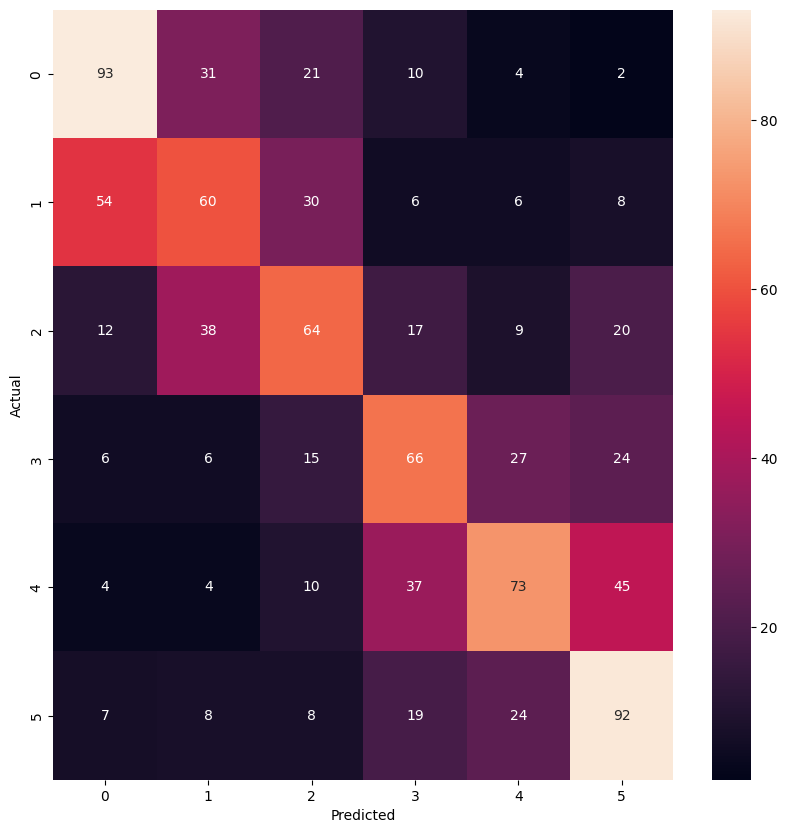

In [17]:
y_pred = classifiermanager.predict(datamanager,log_reg)
datamanager.accuracy_conf_mat(y_pred)

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [18]:
datamanager.inferDataToCSV(df_pred,log_reg,"tfidf","sentence","sentence","result")

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [19]:
classifiermanager.fit_predict("knn",datamanager,verbose=True, params={"n_neighbors":3})

CONFUSION MATRIX:
[[123  25  10   1   1   1]
 [101  48  10   3   1   1]
 [ 89  39  26   4   0   2]
 [ 58  29  16  33   1   7]
 [ 64  37  23  19  20  10]
 [ 49  33  15  16   5  40]]
ACCURACY SCORE:
0.3021
CLASSIFICATION REPORT:
	Precision: 0.4243
	Recall: 0.3028
	F1_Score: 0.2836


KNeighborsClassifier(n_neighbors=3)

Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [20]:
grid = {'n_neighbors': np.arange(1, 10),
        'p': np.arange(1, 3),
        'weights': ['uniform', 'distance']
        }

classifiermanager.gridSearch("knn",grid,datamanager)

best params:  {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
precision : 0.3513020833333333
test precision : 0.36770833333333336


#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [21]:
classifiermanager.fit_predict("decision_tree",datamanager,verbose=True)

CONFUSION MATRIX:
[[83 36 25 10  3  4]
 [48 54 33 19  5  5]
 [28 38 36 24 20 14]
 [ 7 19 34 39 25 20]
 [ 9 20 32 38 39 35]
 [11 18 26 35 29 39]]
ACCURACY SCORE:
0.3021
CLASSIFICATION REPORT:
	Precision: 0.3039
	Recall: 0.3021
	F1_Score: 0.2996


DecisionTreeClassifier()

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [22]:
grid = {'max_depth':np.arange(1,10)}

classifiermanager.gridSearch("decision_tree",grid,datamanager)

best params:  {'max_depth': 7}
precision : 0.32109375
test precision : 0.30104166666666665


#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [23]:
classifiermanager.fit_predict("random_forest",datamanager,verbose=True)


CONFUSION MATRIX:
[[122  19   9   8   2   1]
 [ 77  52  27   5   3   0]
 [ 39  41  46  24   7   3]
 [ 18  14  13  57  27  15]
 [ 16   9  24  54  50  20]
 [ 15  21  11  28  23  60]]
ACCURACY SCORE:
0.4031
CLASSIFICATION REPORT:
	Precision: 0.4148
	Recall: 0.4045
	F1_Score: 0.3935


RandomForestClassifier()

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

##### Searching for the best data_cleaner/vectorizer/classifier combination
our approach is to find the bests cleaner/vectorizer/classifier combination. To do it we've created a little algorithm that tries all the combinations. The result is the five best combinations

In [26]:
datamanager.splitData(0.2,0)
classifiermanager.searchBestCombinations(datamanager,["tfidf","count"],["linear_svc","knn","naive_bayes","random_forest","decision_tree","logistic_regression"],["empty","data_cleaner","lemmatize"])

c:\wamp64\www\demo_rdf\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\wamp64\www\demo_rdf\venv\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\wamp64\www\demo_rdf\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best results:
Vectorizer: TfidfVectorizer
Classifier: MultinomialNB
Cleaner: empty
Accuracy: 0.4822916666666667

Vectorizer: TfidfVectorizer
Classifier: LinearSVC
Cleaner: empty
Accuracy: 0.47604166666666664

Vectorizer: TfidfVectorizer
Classifier: LogisticRegression
Cleaner: lemmatize
Accuracy: 0.471875

Vectorizer: CountVectorizer
Classifier: LogisticRegression
Cleaner: lemmatize
Accuracy: 0.4708333333333333

Vectorizer: TfidfVectorizer
Classifier: LogisticRegression
Cleaner: empty
Accuracy: 0.4666666666666667



##### Searching the best test_size for train test splitting
we've found some interesting combination to explore, for those we've tried to find the best train test data spliting params.
For test_size and Random_state


In [24]:
method = classifiermanager.getClassifier("linear_svc")
vectorizer = datavectorizer.getVectorizer("tfidf")

datamanager.otpimize_test_size(method,vectorizer,np.arange(0.0241,0.0242,0.00001),verbose=True)

Best test_size param for LinearSVC  with TfidfVectorizer
best param value 0.024169999999999997
best score  0.5641025641025641


(0.024169999999999997, 0.5641025641025641)

In [28]:
method = classifiermanager.getClassifier("naive_bayes")
vectorizer = datavectorizer.getVectorizer("tfidf")

datamanager.otpimize_test_size(method,vectorizer,np.arange(0.0241,0.0242,0.00001),verbose=True)

Best test_size param for MultinomialNB  with TfidfVectorizer
best param value 0.024169999999999997
best score  0.5128205128205128


(0.024169999999999997, 0.5128205128205128)

In [29]:
method = classifiermanager.getClassifier("logistic_regression")
vectorizer = datavectorizer.getVectorizer("tfidf")

datamanager.otpimize_test_size(method,vectorizer,np.arange(0.16,0.17,0.01),verbose=True)

Best test_size param for LogisticRegression  with TfidfVectorizer
best param value 0.17
best score  0.48592411260709917


(0.17, 0.48592411260709917)

##### Searching the best random_state for train test splitting


In [30]:
method = classifiermanager.getClassifier("linear_svc")
vectorizer = datavectorizer.getVectorizer("tfidf")

datamanager.otpimize_randomstate(method,vectorizer,np.arange(0,10),verbose=True,test_size=0.024169999999999997)

Best random_state param for LinearSVC  with TfidfVectorizer
best param value 5
best score  0.5982905982905983


(5, 0.5982905982905983)

In [31]:
method = classifiermanager.getClassifier("naive_bayes")
vectorizer = datavectorizer.getVectorizer("tfidf")

datamanager.otpimize_randomstate(method,vectorizer,np.arange(0,10),verbose=True,test_size=0.024169999999999997)

Best random_state param for MultinomialNB  with TfidfVectorizer
best param value 5
best score  0.6324786324786325


(5, 0.6324786324786325)

In [28]:
method = classifiermanager.getClassifier("logistic_regression")
vectorizer = datavectorizer.getVectorizer("tfidf")

datamanager.otpimize_randomstate(method,vectorizer,np.arange(0,10),verbose=True,test_size=0.17)

Best random_state param for LogisticRegression  with TfidfVectorizer
best param value 0
best score  0.48592411260709917


(0, 0.48592411260709917)

##### Doing some gridsearch

In [47]:

param_grid = {
    'alpha': np.arange(0.001,0.01,0.001),
    "fit_prior":[True,False]
}
datavectorizer.fit("tfidf",datamanager)

classifiermanager.gridSearch("naive_bayes",param_grid,datamanager)

best params:  {'alpha': 0.009000000000000001, 'fit_prior': True}
pécision : 0.4219519926296874


##### Fit predict some models
we use the test_size and random state that we found for each classifier to have te most optimal result

In [31]:
datamanager.splitData(0.17,0)

datacleaner.clean(datamanager,["lemmatize"])

datavectorizer.fit("tfidf",datamanager)

classifiermanager.fit_predict("logistic_regression",datamanager,verbose=True)

datacleaner.unClean(datamanager) # unclean after a cleaning


CONFUSION MATRIX:
[[87 30 13  9  2  2]
 [40 56 25  7  4  6]
 [ 9 32 51 15  8 18]
 [ 7  5 13 60 22 18]
 [ 3  3  8 28 62 40]
 [ 6  7  7 14 19 81]]
ACCURACY SCORE:
0.4859
CLASSIFICATION REPORT:
	Precision: 0.4835
	Recall: 0.4854
	F1_Score: 0.4822


In [32]:
datamanager.splitData(0.024169999999999997,5)

datavectorizer.fit("tfidf",datamanager)

classifiermanager.fit_predict("linear_svc",datamanager,verbose=True)

CONFUSION MATRIX:
[[15  3  0  0  1  0]
 [ 6 10  4  0  0  0]
 [ 0  6 11  0  1  0]
 [ 2  1  3  7  1  4]
 [ 0  1  1  1  8  7]
 [ 0  0  1  3  1 19]]
ACCURACY SCORE:
0.5983
CLASSIFICATION REPORT:
	Precision: 0.6025
	Recall: 0.5876
	F1_Score: 0.5835


LinearSVC()

In [33]:
datamanager.splitData(0.024169999999999997,5)

datavectorizer.fit("tfidf",datamanager)

classifiermanager.fit_predict("naive_bayes",datamanager,verbose=True,params={'alpha': 0.009000000000000001, 'fit_prior': True})

CONFUSION MATRIX:
[[13  5  1  0  0  0]
 [ 6 13  1  0  0  0]
 [ 1  4 11  0  1  1]
 [ 3  0  2  9  3  1]
 [ 0  1  0  0 12  5]
 [ 0  0  2  1  1 20]]
ACCURACY SCORE:
0.6667
CLASSIFICATION REPORT:
	Precision: 0.6874
	Recall: 0.6576
	F1_Score: 0.6609


MultinomialNB(alpha=0.009000000000000001)

In [34]:
datamanager.splitData(0.17,0)

datacleaner.clean(datamanager,["lemmatize"])

datavectorizer.fit("count",datamanager)

classifiermanager.fit_predict("logistic_regression",datamanager,verbose=True)

datacleaner.unClean(datamanager) # unclean after a cleaning

CONFUSION MATRIX:
[[95 33 10  4  0  1]
 [48 63 14  7  3  3]
 [11 34 57 13 10  8]
 [12 10 17 57 15 14]
 [10  9 13 36 50 26]
 [ 8 10  9 21 21 65]]
ACCURACY SCORE:
0.4737
CLASSIFICATION REPORT:
	Precision: 0.4769
	Recall: 0.4730
	F1_Score: 0.4698


In [35]:
datamanager.splitData(0.17,0)

datavectorizer.fit("tfidf",datamanager)

classifiermanager.fit_predict("logistic_regression",datamanager,verbose=True)

CONFUSION MATRIX:
[[87 30 13  9  2  2]
 [40 56 25  7  4  6]
 [ 9 32 51 15  8 18]
 [ 7  5 13 60 22 18]
 [ 3  3  8 28 62 40]
 [ 6  7  7 14 19 81]]
ACCURACY SCORE:
0.4859
CLASSIFICATION REPORT:
	Precision: 0.4835
	Recall: 0.4854
	F1_Score: 0.4822


LogisticRegression(max_iter=1000, random_state=50)

#### 4.7. Show a summary of your results
To remind here are the best result of the search of best combination. So we tried to find the special parameters of these combinations.

Best results:
Vectorizer: TfidfVectorizer
Classifier: MultinomialNB
Cleaner: empty

Vectorizer: TfidfVectorizer
Classifier: LinearSVC
Cleaner: empty

Vectorizer: TfidfVectorizer
Classifier: LogisticRegression
Cleaner: lemmatize

Vectorizer: CountVectorizer
Classifier: LogisticRegression
Cleaner: lemmatize

Vectorizer: TfidfVectorizer
Classifier: LogisticRegression
Cleaner: empty


Here is a table result (handmade)

In [37]:
data = {'combination': ['TfidfVectorizer/MultinomialNB/empty', 'TfidfVectorizer/LinearSVC/empty', 'TfidfVectorizer/LogisticRegression/lemmatize','CountVectorizer/LogisticRegression/empty','TfidfVectorizer/LogisticRegression/empty'],
        'accurancy': [0.6667, 0.5983, 0.4859,0.4737,0.4859]}

df = pd.DataFrame(data)

df.head()



,combination,accurancy
0,TfidfVectorizer/MultinomialNB/empty,0.6667
1,TfidfVectorizer/LinearSVC/empty,0.5983
2,TfidfVectorizer/LogisticRegression/lemmatize,0.4859
3,CountVectorizer/LogisticRegression/empty,0.4737
4,TfidfVectorizer/LogisticRegression/empty,0.4859
